In [ ]:
import tensorflow as tf
import keras

from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

train_dir = "path/to/train/images"
val_dir = "path/to/val/images"

# refitting the image size to 256x256
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir, labels="inferred", label_mode="int", batch_size=32, shuffle=True
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir, labels="inferred", label_mode="int", batch_size=32, shuffle=True
)


# Scaling down from 255 to 0-1 values
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


In [5]:
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Training

# Model 1 Architecture

- **Input Layer**: (64, 64, 3)
- **Conv2D**: 32 kernels, (3x3), ReLU activation
    - **MaxPooling2D**: (2x2)
    - **Dropout**: 50%
- **Conv2D**: 64 kernels, (3x3), ReLU activation
    - **MaxPooling2D**: (2x2)
    - **Dropout**: 50%
- **Conv2D**: 64 kernels, (3x3), ReLU activation
    - **Dropout**: 50% 
- **Flatten The Data**
- **Dense**: 64 nodes, ReLU activation
- **Dense (Output Layer)**: 2 units


In [7]:
keras.backend.clear_session()

callback = [tf.keras.callbacks.EarlyStopping(patience=3)]

with tf.device("/gpu:2"):
    model1 = models.Sequential()
    model1.add(layers.InputLayer((256, 256, 3)))

    model1.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
    model1.add(layers.Dropout(0.5))
    model1.add(layers.MaxPool2D((2, 2)))

    model1.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
    model1.add(layers.Dropout(0.5))
    model1.add(layers.MaxPool2D((2, 2)))

    model1.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
    model1.add(layers.Dropout(0.5))

    model1.add(layers.Flatten())
    model1.add(layers.Dense(64, activation="relu"))
    model1.add(layers.Dense(1, activation="sigmoid"))

    model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    m1_history = model1.fit(
        train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback
    )

Epoch 1/50


2025-03-01 20:51:56.758976: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 157s 34ms/step - accuracy: 0.7131 - loss: 0.6091 - val_accuracy: 0.7812 - val_loss: 0.4988
Epoch 2/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 106s 24ms/step - accuracy: 0.8768 - loss: 0.2874 - val_accuracy: 0.8580 - val_loss: 0.3519
Epoch 3/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 104s 24ms/step - accuracy: 0.9194 - loss: 0.1963 - val_accuracy: 0.8852 - val_loss: 0.3184
Epoch 4/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 106s 24ms/step - accuracy: 0.9383 - loss: 0.1534 - val_accuracy: 0.8879 - val_loss: 0.2866
Epoch 5/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 105s 24ms/step - accuracy: 0.9497 - loss: 0.1259 - val_accuracy: 0.8941 - val_loss: 0.2670
Epoch 6/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 103s 24ms/step - accuracy: 0.9577 - loss: 0.1064 - val_accuracy: 0.8987 - val_loss: 0.2604
Epoch 7/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 104s 24ms/step - accuracy: 0.9646 - loss: 0.0908 - val_accuracy: 0.8862 - val_loss: 0.2852
Epoch 8/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 105s 24ms/step - accuracy: 0.9660 - lo

In [8]:
model1.save("../models/second_best_model_256_256.keras")

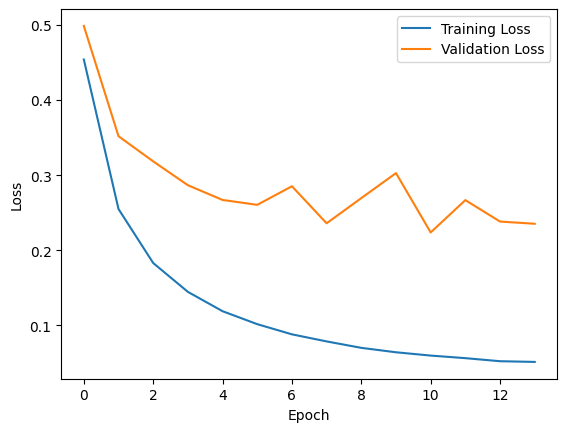

In [9]:
import matplotlib.pyplot as plt

plt.plot(m1_history.history["loss"], label="Training Loss")
plt.plot(m1_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Model 3 Architecure

- **Input Layer**: (64, 64, 3)
- **Conv2D**: 64 kernels, (3x3), ReLU activation
    - **MaxPooling2D**: (2x2)
    - **Dropout**: 20%
- **Conv2D**: 128 kernels, (3x3), ReLU activation
    - **MaxPooling2D**: (2x2)
    - **Dropout**: 20%
- **Conv2D**: 256 kernels, (3x3), ReLU activation
    - **Dropout**: 20%
- **Flatten The Data**
- **Dense**: 128 nodes, ReLU activation
    - **Dropout**: 20%
- **Dense (Output Layer)**: 2 units

In [10]:
keras.backend.clear_session()


with tf.device("/gpu:2"):

    model3 = models.Sequential()

    model3.add(layers.InputLayer((256, 256, 3)))
    model3.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model3.add(layers.MaxPool2D((2, 2)))
    model3.add(layers.Dropout(0.2))

    model3.add(layers.Conv2D(128, (3, 3), activation="relu"))
    model3.add(layers.MaxPool2D((2, 2)))
    model3.add(layers.Dropout(0.2))

    model3.add(layers.Conv2D(256, (3, 3), activation="relu"))
    model3.add(layers.Dropout(0.2))

    model3.add(layers.Flatten())
    model3.add(layers.Dense(128, activation="relu"))
    model3.add(layers.Dropout(0.2))

    model3.add(layers.Dense(1, activation="sigmoid"))

    model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    m3_history = model3.fit(
        train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback
    )

Epoch 1/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7079 - loss: 0.6217

2025-03-01 21:21:24.514906: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion', 48 bytes spill stores, 48 bytes spill loads



4376/4376 ━━━━━━━━━━━━━━━━━━━━ 233s 51ms/step - accuracy: 0.7079 - loss: 0.6216 - val_accuracy: 0.8455 - val_loss: 0.3388
Epoch 2/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 217s 50ms/step - accuracy: 0.9033 - loss: 0.2351 - val_accuracy: 0.8879 - val_loss: 0.2608
Epoch 3/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 221s 50ms/step - accuracy: 0.9308 - loss: 0.1740 - val_accuracy: 0.8956 - val_loss: 0.2680
Epoch 4/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 233s 53ms/step - accuracy: 0.9469 - loss: 0.1349 - val_accuracy: 0.8976 - val_loss: 0.2652
Epoch 5/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 214s 49ms/step - accuracy: 0.9554 - loss: 0.1128 - val_accuracy: 0.9016 - val_loss: 0.2896


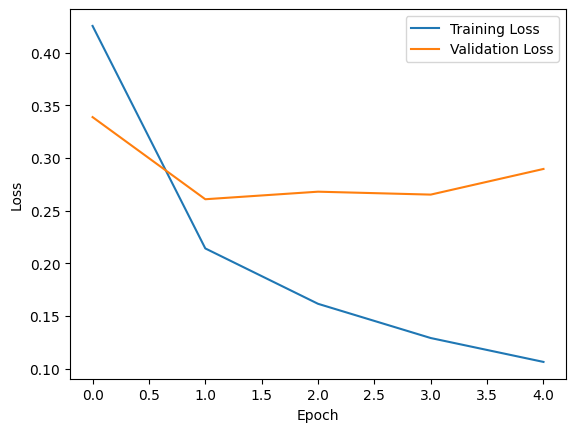

In [11]:
plt.plot(m3_history.history["loss"], label="Training Loss")
plt.plot(m3_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
model3.save("../models/best_model_256_256.keras")